In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import geopandas as gpd
import geobr
import seaborn as sns
sns.set(style="white")

In [78]:
sys.path.append('..')

In [79]:
df_18 = pd.read_csv('../Data/processed/EXANBR18.csv')
df_19 = pd.read_csv('../Data/processed/EXANBR19.csv')
df_20 = pd.read_csv('../Data/processed/EXANBR20.csv')

C:\Users\denis\AppData\Local\Temp\ipykernel_10468\3890119570.py:1: DtypeWarning: Columns (26,29,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df_18 = pd.read_csv('../Data/processed/EXANBR18.csv')


In [80]:
df = pd.concat([df_18,df_19,df_20])

In [81]:
df = df[df['DT_SIN_PRI'] >= '2018-01-01']

In [82]:
df_first_symp = df.groupby(['ID_MN_RESI'])['DT_SIN_PRI'].min()

In [83]:
df_first_symp = df_first_symp.reset_index()

In [84]:
df_first_symp

,ID_MN_RESI,DT_SIN_PRI
0,110004.0,2019-11-06
1,110012.0,2018-07-09
2,110020.0,2018-06-11
3,110030.0,2020-01-18
4,120040.0,2018-06-23
...,...,...
843,521210.0,2019-09-05
844,521250.0,2019-08-14
845,521830.0,2019-08-11
846,521860.0,2020-02-25


In [85]:
map_br = geobr.read_municipality()

In [86]:
map_br['code_muni'] = map_br['code_muni'].astype(str).str[:6].astype(int)

In [87]:
map_br = map_br.merge(df_first_symp, how = 'left', left_on = 'code_muni', right_on = 'ID_MN_RESI')

In [88]:
map_br['DT_SIN_PRI'] = pd.to_datetime(map_br['DT_SIN_PRI'])

In [89]:
map_br['ANO_SIN_PRI'] = map_br['DT_SIN_PRI'].dt.year

In [91]:
map_br['ANO_SIN_PRI'] = map_br['ANO_SIN_PRI'].astype('Int64')

C:\Users\denis\Anaconda3\lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\denis\Anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\denis\Anaconda3\lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\denis\Anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coord

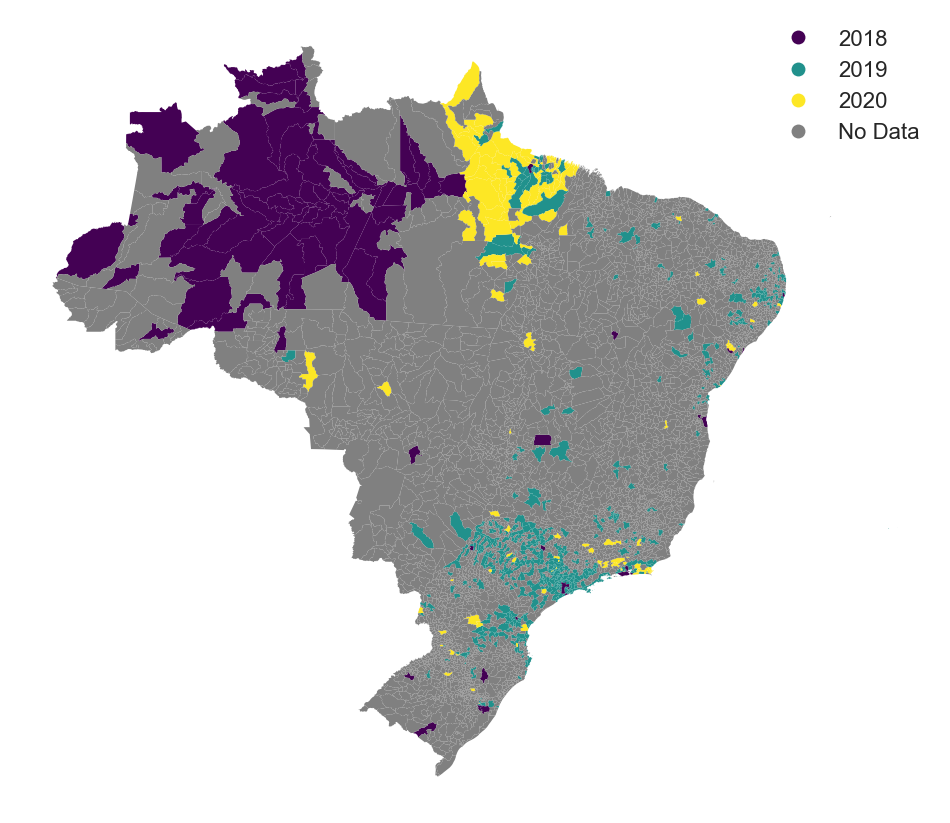

In [97]:
missing_kwds = dict(color='grey', label='No Data')

fig, axs = plt.subplots(figsize = (12,12))

map_br.plot(
        ax=axs, 
        column='ANO_SIN_PRI', 
        missing_kwds=missing_kwds,
        linewidth=0.0,
        categorical = True,
        cmap = 'viridis',
        legend = True,
        legend_kwds={'fontsize':16,'frameon':False}
    )

axs.axis("off") 
plt.savefig('../Figs/first_symptoms_map.pdf',bbox_inches='tight')